### 1. Importing Dataset

In [2]:
import pandas as pd

data = pd.read_csv('customer_purchase_data.csv')


data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


(None,
    Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
 0   40       1   66120.267939                  8                0   
 1   20       1   23579.773583                  4                2   
 2   27       1  127821.306432                 11                2   
 3   24       1  137798.623120                 19                3   
 4   31       1   99300.964220                 19                1   
 
    TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
 0           30.568601               0                 5               1  
 1           38.240097               0                 5               0  
 2           31.633212               1                 0               1  
 3           46.167059               0                 4               1  
 4           19.823592               0                 0               1  )

### 2. EDA

### 2.1 Summary Statistics

In [3]:
print(data.describe())

               Age       Gender   AnnualIncome  NumberOfPurchases  \
count  1500.000000  1500.000000    1500.000000        1500.000000   
mean     44.298667     0.504667   84249.164338          10.420000   
std      15.537259     0.500145   37629.493078           5.887391   
min      18.000000     0.000000   20001.512518           0.000000   
25%      31.000000     0.000000   53028.979155           5.000000   
50%      45.000000     1.000000   83699.581476          11.000000   
75%      57.000000     1.000000  117167.772858          15.000000   
max      70.000000     1.000000  149785.176481          20.000000   

       ProductCategory  TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  \
count      1500.000000         1500.000000     1500.000000       1500.000000   
mean          2.012667           30.469040        0.326667          2.555333   
std           1.428005           16.984392        0.469151          1.705152   
min           0.000000            1.037023        0.000000

### 2.2 Correlation Matrix


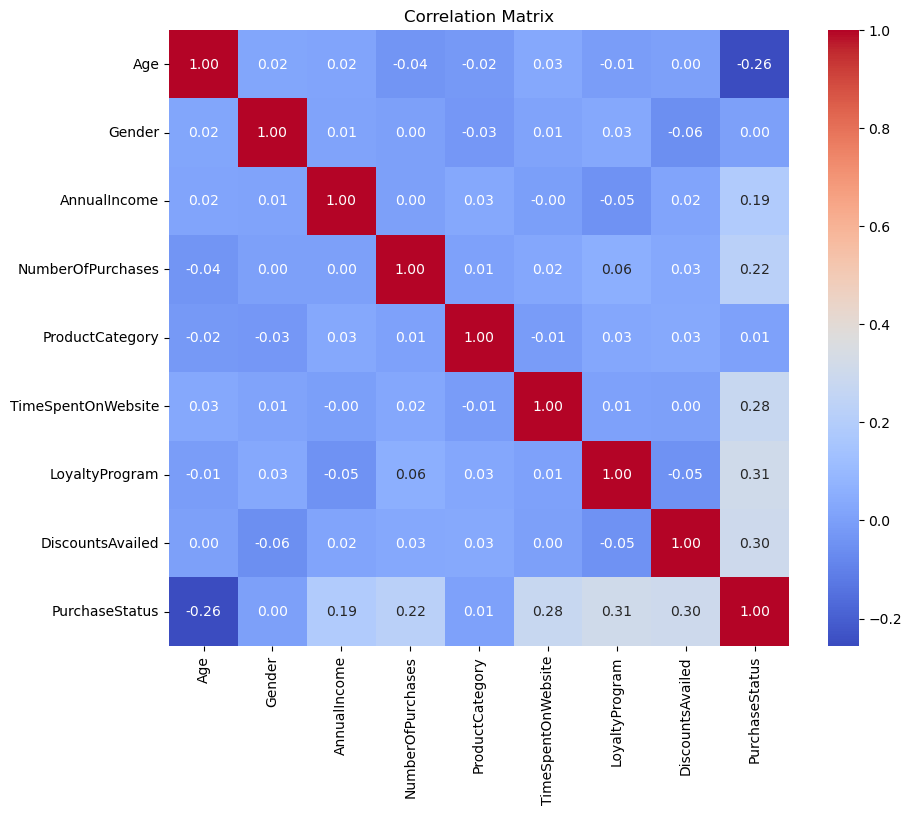

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Comments -
#### Age has a negative correlation (-0.26) with PurchaseStatus—older customers are less likely to purchase.
#### TimeSpentOnWebsite (0.28), LoyaltyProgram (0.31), DiscountsAvailed (0.30), NumberOfPurchases (0.22), and AnnualIncome (0.19) have positive correlations with PurchaseStatus—these features indicate a higher likelihood of purchasing.
#### LoyaltyProgram and DiscountsAvailed are moderately correlated (0.31), suggesting customers in loyalty programs are more likely to use discounts.
#### Low correlation among other features indicates minimal multicollinearity, meaning most features provide unique information.

### 2.3 Histograms for Numeric Features

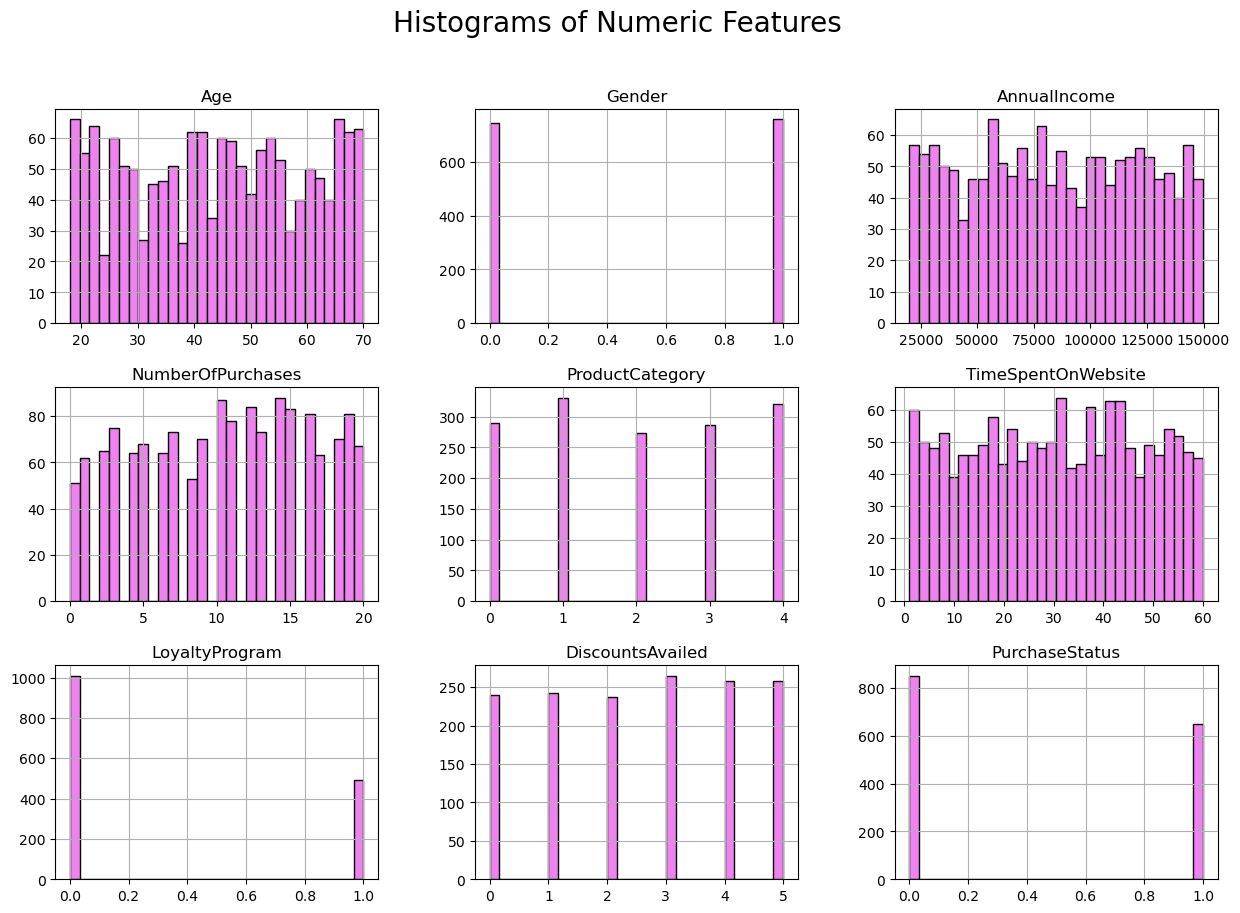

In [5]:
data.hist(bins=30, figsize=(15, 10), color='violet', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=20)
plt.show()

### Comments -
#### Age: The distribution is relatively uniform across different age groups, with slight peaks around the 20s and 60s.
#### Gender: The dataset is heavily skewed towards one gender (likely binary-coded, with 1 representing the majority).
#### AnnualIncome: Income distribution is fairly even across the range, with no significant outliers.
#### NumberOfPurchases: Purchases are relatively evenly distributed, with some peaks, particularly around the lower purchase numbers.
#### ProductCategory: There are distinct spikes, indicating certain categories (likely categorical values) are more popular.
#### TimeSpentOnWebsite: Time spent on the website is uniformly distributed across the recorded range.
#### LoyaltyProgram: A large portion of the customers are enrolled in the loyalty program.
#### DiscountsAvailed: Discounts are evenly distributed across different levels, with more customers availing multiple discounts.
#### PurchaseStatus: The majority of the customers have made purchases, as indicated by the skewed distribution.

### 2.4 Boxplots for Numerical Features vs PurchaseStatus

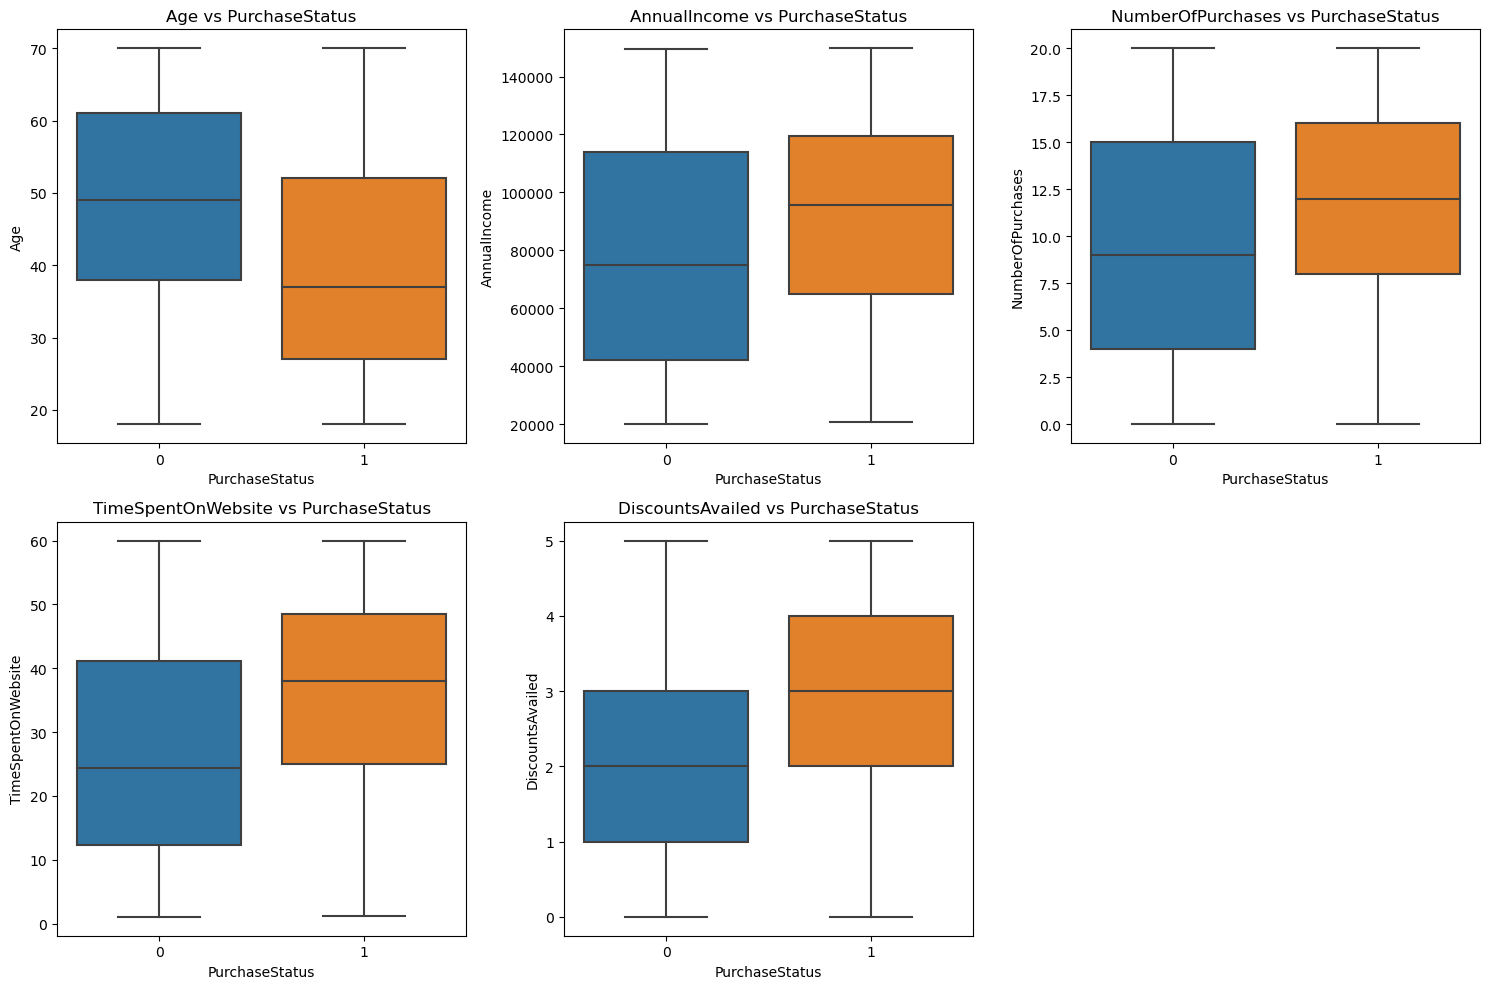

In [6]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='PurchaseStatus', y=column, data=data)
    plt.title(f'{column} vs PurchaseStatus')

plt.tight_layout()
plt.show()

### Comments -
#### Age vs PurchaseStatus: Customers who made a purchase (PurchaseStatus = 1) tend to be younger on average compared to those who didn't make a purchase (PurchaseStatus = 0).

#### AnnualIncome vs PurchaseStatus: Those who made a purchase generally have a higher annual income compared to those who did not.

#### TimeSpentOnWebsite vs PurchaseStatus: There is no significant difference in the time spent on the website between customers who made a purchase and those who didn't.

#### DiscountsAvailed vs PurchaseStatus: Customers who availed more discounts are more likely to have made a purchase.

### 3. Preprocessing

### 3.1 Feature Selection and Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = data.drop(columns=['PurchaseStatus'])
y = data['PurchaseStatus']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### 3.2 Standardize the Features

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4. Model Training and Evaluation

### 4.1 Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluation
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_recall = recall_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

print("Logistic Regression:")
print(f"Precision: {logreg_precision:.2f}")
print(f"Recall: {logreg_recall:.2f}")
print(f"F1 Score: {logreg_f1:.2f}")
print(f"Accuracy: {logreg_accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression:
Precision: 0.84
Recall: 0.76
F1 Score: 0.80
Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       256
           1       0.84      0.76      0.80       194

    accuracy                           0.84       450
   macro avg       0.84      0.83      0.83       450
weighted avg       0.84      0.84      0.83       450



### 4.2 Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)

# Predictions
y_pred_dtree = dtree.predict(X_test_scaled)

# Evaluation
dtree_precision = precision_score(y_test, y_pred_dtree)
dtree_recall = recall_score(y_test, y_pred_dtree)
dtree_f1 = f1_score(y_test, y_pred_dtree)
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)

print("Decision Tree:")
print(f"Precision: {dtree_precision:.2f}")
print(f"Recall: {dtree_recall:.2f}")
print(f"F1 Score: {dtree_f1:.2f}")
print(f"Accuracy: {dtree_accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dtree))

Decision Tree:
Precision: 0.87
Recall: 0.85
F1 Score: 0.86
Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       256
           1       0.87      0.85      0.86       194

    accuracy                           0.88       450
   macro avg       0.88      0.88      0.88       450
weighted avg       0.88      0.88      0.88       450



### 4.3 K-Nearest Neighbors (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluation
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_accuracy = accuracy_score(y_test, y_pred_knn)


print("KNN:")
print(f"Precision: {knn_precision:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"F1 Score: {knn_f1:.2f}")
print(f"Accuracy: {knn_accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

KNN:
Precision: 0.83
Recall: 0.86
F1 Score: 0.84
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       256
           1       0.83      0.86      0.84       194

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450



In [21]:
print(confusion_matrix(y_test,pred))

[[193  63]
 [102  92]]


In [22]:
accuracy_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)  # Create a new KNeighborsClassifier object
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score = accuracy_score(y_test, pred)
    accuracy_rate.append(score)
    
accuracy_rate

[0.5911111111111111,
 0.58,
 0.5911111111111111,
 0.5955555555555555,
 0.5777777777777777,
 0.5844444444444444,
 0.6066666666666667,
 0.5777777777777777,
 0.5844444444444444,
 0.5733333333333334,
 0.5955555555555555,
 0.5866666666666667,
 0.6066666666666667,
 0.6,
 0.6222222222222222,
 0.6066666666666667,
 0.6222222222222222,
 0.6088888888888889,
 0.6311111111111111,
 0.6133333333333333,
 0.6266666666666667,
 0.62,
 0.6311111111111111,
 0.6155555555555555,
 0.6222222222222222,
 0.6155555555555555,
 0.6133333333333333,
 0.6155555555555555,
 0.6,
 0.6088888888888889,
 0.6155555555555555,
 0.6244444444444445,
 0.6222222222222222,
 0.6333333333333333,
 0.6266666666666667,
 0.6333333333333333,
 0.6422222222222222,
 0.6288888888888889,
 0.6333333333333333]

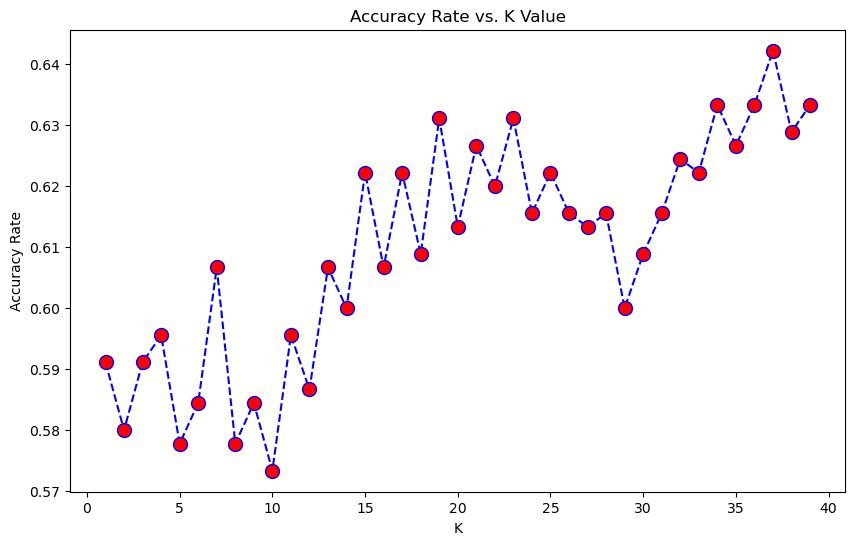

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

#### The graph suggests that there is no single K value that consistently provides the best accuracy across the board. However, it is clear that smaller values of K (e.g., K = 1, K = 5) give higher accuracy compared to larger values. The optimal value of K would likely be one of these local maxima.

In [24]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=1


[[210  46]
 [143  51]]


0.58


In [25]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=21


[[180  76]
 [ 92 102]]


0.6266666666666667


### 5. Hyperparameter Tuning

### 5.1 Logistic Regression

In [26]:
# Defining the parameter grid
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize the GridSearchCV object for Logistic Regression
grid_search_lr = GridSearchCV(estimator=logreg, param_grid=param_grid_lr, cv=5, scoring='f1', n_jobs=-1)

# Fit the model
grid_search_lr.fit(X_train_scaled, y_train)

# Best parameters and model for Logistic Regression
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_

# Predictions with the best model
y_pred_best_lr = best_model_lr.predict(X_test_scaled)

# Evaluation
best_lr_precision = precision_score(y_test, y_pred_best_lr)
best_lr_recall = recall_score(y_test, y_pred_best_lr)
best_lr_f1 = f1_score(y_test, y_pred_best_lr)
best_lr_accuracy = accuracy_score(y_test, y_pred_best_lr)

# Print the best scores for Logistic Regression
print("Best Tuned Logistic Regression Scores:")
print(f"Precision: {best_lr_precision:.2f}")
print(f"Recall: {best_lr_recall:.2f}")
print(f"F1 Score: {best_lr_f1:.2f}")
print(f"Accuracy: {best_lr_accuracy:.2f}")

Best Tuned Logistic Regression Scores:
Precision: 0.84
Recall: 0.76
F1 Score: 0.80
Accuracy: 0.84


### 5.2 Decision Tree

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Initialize the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for Decision Tree
param_grid_dtree = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV object for Decision Tree
grid_search_dtree = GridSearchCV(estimator=dtree, param_grid=param_grid_dtree, cv=5, scoring='f1', n_jobs=-1)

# Fit the model
grid_search_dtree.fit(X_train_scaled, y_train)

# Best parameters and model for Decision Tree
best_params_dtree = grid_search_dtree.best_params_
best_model_dtree = grid_search_dtree.best_estimator_

# Predictions with the best model
y_pred_best_dtree = best_model_dtree.predict(X_test_scaled)

# Evaluation
best_dtree_precision = precision_score(y_test, y_pred_best_dtree)
best_dtree_recall = recall_score(y_test, y_pred_best_dtree)
best_dtree_f1 = f1_score(y_test, y_pred_best_dtree)
best_dtree_accuracy = accuracy_score(y_test, y_pred_best_dtree)

# Print the best scores for Decision Tree
print("Best Tuned Decision Tree Scores:")
print(f"Precision: {best_dtree_precision:.2f}")
print(f"Recall: {best_dtree_recall:.2f}")
print(f"F1 Score: {best_dtree_f1:.2f}")
print(f"Accuracy: {best_dtree_accuracy:.2f}")

Best Tuned Decision Tree Scores:
Precision: 0.88
Recall: 0.90
F1 Score: 0.89
Accuracy: 0.90


### 5.3 KNN


In [27]:
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the GridSearchCV object for KNN
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='f1', n_jobs=-1)

# Fit the model
grid_search_knn.fit(X_train_scaled, y_train)

# Best parameters and model for KNN
best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_

# Predictions with the best model
y_pred_best_knn = best_model_knn.predict(X_test_scaled)

# Evaluation
best_knn_precision = precision_score(y_test, y_pred_best_knn)
best_knn_recall = recall_score(y_test, y_pred_best_knn)
best_knn_f1 = f1_score(y_test, y_pred_best_knn)
best_knn_accuracy = accuracy_score(y_test, y_pred_best_knn)

# Print the best scores for KNN
print("Best Tuned KNN Scores:")
print(f"Precision: {best_knn_precision:.2f}")
print(f"Recall: {best_knn_recall:.2f}")
print(f"F1 Score: {best_knn_f1:.2f}")
print(f"Accuracy: {best_knn_accuracy:.2f}")

Best Tuned KNN Scores:
Precision: 0.88
Recall: 0.81
F1 Score: 0.84
Accuracy: 0.87
